# Predictive modeling on product returns on E-Commerse website

# Import Necessary Libraries

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.express as px
import scipy as sp

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [4]:
df = pd.read_csv(r"C:\Users\MMM\Documents\ecomc\ecom return prediction\order_dataset.csv")

# Exploratory Data Analysis

In [5]:
df.head()

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,14/04/2019,1,74.17,0.0,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,14/02/2019,-1,0.00,0.0,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,28/11/2018,-1,0.00,0.0,-74.17,-74.17,-14.83,-89.0,-1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,3/3/2019,1,79.17,0.0,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,26/11/2018,1,74.17,0.0,0.00,74.17,14.83,89.0,0,1


In [6]:
df.nunique()

Item Name                  49
Category                   23
Version                   371
Item Code                7643
Item ID                  1052
Buyer ID                25543
Transaction ID          30701
Date                      181
Final Quantity             10
Total Revenue             149
Price Reductions          745
Refunds                   505
Final Revenue            1621
Sales Tax                1184
Overall Revenue          1456
Refunded Item Count         4
Purchased Item Count        7
dtype: int64

In [7]:
df.dtypes

Item Name                object
Category                 object
Version                  object
Item Code                object
Item ID                 float64
Buyer ID                float64
Transaction ID          float64
Date                     object
Final Quantity            int64
Total Revenue           float64
Price Reductions        float64
Refunds                 float64
Final Revenue           float64
Sales Tax               float64
Overall Revenue         float64
Refunded Item Count       int64
Purchased Item Count      int64
dtype: object

In [8]:
df.shape

(70052, 17)

In [9]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if column contains numerical values
        df[column] = df[column].abs()

In [10]:
pd.set_option('display.max_columns', None)
df.head()

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,14/04/2019,1,74.17,0.0,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,14/02/2019,1,0.00,0.0,79.17,79.17,15.83,95.0,1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,28/11/2018,1,0.00,0.0,74.17,74.17,14.83,89.0,1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,3/3/2019,1,79.17,0.0,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,26/11/2018,1,74.17,0.0,0.00,74.17,14.83,89.0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item Name             70052 non-null  object 
 1   Category              70052 non-null  object 
 2   Version               70052 non-null  object 
 3   Item Code             70052 non-null  object 
 4   Item ID               70052 non-null  float64
 5   Buyer ID              70052 non-null  float64
 6   Transaction ID        70052 non-null  float64
 7   Date                  70052 non-null  object 
 8   Final Quantity        70052 non-null  int64  
 9   Total Revenue         70052 non-null  float64
 10  Price Reductions      70052 non-null  float64
 11  Refunds               70052 non-null  float64
 12  Final Revenue         70052 non-null  float64
 13  Sales Tax             70052 non-null  float64
 14  Overall Revenue       70052 non-null  float64
 15  Refunded Item Count

In [12]:
df.describe()

,Item ID,Buyer ID,Transaction ID,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442318e+11,6.013091e+11,5.506075e+13,1.011377,61.776302,4.949904,10.246051,66.955755,13.154665,80.110421,0.156098,0.857277
std,4.255077e+12,6.223201e+12,2.587640e+13,0.124965,31.800689,7.769972,25.154677,19.239057,4.048723,22.789519,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000660e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270320e+13,1.000000,51.670000,0.000000,0.000000,57.500000,11.000000,69.000000,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522210e+13,1.000000,74.170000,0.000000,0.000000,66.750000,13.350000,80.100000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736880e+13,1.000000,79.170000,8.340000,0.000000,79.160000,15.830000,95.000000,0.000000,1.000000
max,8.422210e+13,9.977410e+13,9.999550e+13,6.000000,445.000000,200.000000,237.500000,445.000000,63.340000,445.000000,3.000000,6.000000


In [13]:
df.isna().sum()

Item Name               0
Category                0
Version                 0
Item Code               0
Item ID                 0
Buyer ID                0
Transaction ID          0
Date                    0
Final Quantity          0
Total Revenue           0
Price Reductions        0
Refunds                 0
Final Revenue           0
Sales Tax               0
Overall Revenue         0
Refunded Item Count     0
Purchased Item Count    0
dtype: int64

In [14]:
df.columns

Index(['Item Name', 'Category', 'Version', 'Item Code', 'Item ID', 'Buyer ID',
       'Transaction ID', 'Date', 'Final Quantity', 'Total Revenue',
       'Price Reductions', 'Refunds', 'Final Revenue', 'Sales Tax',
       'Overall Revenue', 'Refunded Item Count', 'Purchased Item Count'],
      dtype='object')

In [15]:
df['Item Name'].value_counts()

WHX    12320
YQX     7749
RJF     4665
XEB     4010
QID     3644
AYN     3430
KNB     3384
NMA     2892
LQS     2591
OTH     2072
OHR     1397
TSH     1345
CLH     1288
NWB     1249
MTW     1057
VXH      910
NSP      894
ZQV      893
FTU      866
QMB      778
EXR      771
KDP      752
LPZ      719
FQD      713
HZX      711
YMR      689
UQJ      679
RIH      606
AZN      582
CRH      571
OUT      567
RJK      541
JAF      528
OVT      522
INU      490
EYV      428
FMR      419
YYI      419
MAG      384
JYJ      309
ELV      277
DPR      266
EKJ      213
BKT      108
OJN       99
VTH       93
DAL       87
DFH       73
PRT        2
Name: Item Name, dtype: int64

In [16]:
df['Category'].value_counts()

Product P    23352
Product H    15963
Product D     7079
Product B     3510
Product N     3348
Product W     2677
Product A     2461
Product C     2456
Product R     2106
Product J     1549
Product O     1158
Product F     1055
Product Q      638
Product G      548
Product I      499
Product M      449
Product U      383
DPR            266
Product T      228
Product E      201
Product L      115
Product K       10
Product S        1
Name: Category, dtype: int64

In [17]:
df['Version'].value_counts()

34 / B / FtO    5696
32 / A / FtO    4562
36 / B / FtO    3981
34 / A / FtO    3807
32 / B / FtO    3541
                ... 
31 / C / 29        1
28 / C / 31        1
40 / A / 7         1
30 / A / 27        1
40 / B / 28        1
Name: Version, Length: 371, dtype: int64

In [18]:
df['Item Code'].value_counts()

4A-30E-267-CB3-1-506E7F7    724
93-BCE-0C8-1F0-0-CE76A69    686
76-BA0-289-04B-C-9EB5C4F    569
85-2EB-163-D62-5-FC50316    480
91-036-77F-B0C-A-F756CA7    469
                           ... 
CF-E15-B3F-C8A-5-EFCE848      1
F4-34B-CF8-EB5-D-CB8EDFB      1
F6-E36-F9A-C1C-8-861D727      1
CD-6A1-0D9-24F-9-4D0AD76      1
28-AE2-4E8-C12-1-5BE05EA      1
Name: Item Code, Length: 7643, dtype: int64

In [19]:
df['Item ID'].value_counts()

24064862.0    3134
22559066.0    2923
40522014.0    2468
88419828.0    2106
26922227.0    2103
              ... 
87233839.0       1
73763955.0       1
44945619.0       1
94793801.0       1
67334074.0       1
Name: Item ID, Length: 1052, dtype: int64

In [20]:
df['Buyer ID'].value_counts()

8325158.0    63
2028611.0    59
6578818.0    44
1386862.0    37
1836343.0    36
             ..
3379569.0     1
3060082.0     1
7136981.0     1
6025545.0     1
6808059.0     1
Name: Buyer ID, Length: 25543, dtype: int64

In [21]:
# Number of the Buyer ID in data
len(df['Buyer ID'].value_counts())

25543

In [22]:
df['Transaction ID'].value_counts()

1.338760e+13    44
5.800360e+13    39
2.531560e+13    35
7.292730e+13    34
5.476800e+13    33
                ..
4.406080e+13     1
3.517750e+13     1
9.520300e+13     1
8.944940e+13     1
2.156440e+13     1
Name: Transaction ID, Length: 30701, dtype: int64

In [23]:
df['Date'].value_counts()

23/11/2018    2337
26/11/2018    1824
2/1/2019      1711
26/12/2018    1457
8/3/2019      1110
              ... 
9/2/2019       132
7/2/2019       123
19/01/2019      92
23/12/2018      72
22/12/2018      58
Name: Date, Length: 181, dtype: int64

In [24]:
df['Final Quantity'].value_counts()

1    69187
2      742
0       68
3       45
4        8
5        1
6        1
Name: Final Quantity, dtype: int64

In [25]:
df['Refunded Item Count'].value_counts()

0    59269
1    10639
2      136
3        8
Name: Refunded Item Count, dtype: int64

In [26]:
df['Purchased Item Count'].value_counts()

1    58680
0    10715
2      610
3       37
4        8
5        1
6        1
Name: Purchased Item Count, dtype: int64

In [27]:
import pandas as pd

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Now you can sort the DataFrame by the 'Date' column
df = df.sort_values(by='Date')

print(df)

      Item Name   Category       Version                 Item Code  \
66018       QID  Product A  35 / A / FtO  30-C60-455-D74-A-363ECC7   
795         RJF  Product P  31 / C / FtO  E5-0D6-8F7-54E-E-B39435C   
67314       WHX  Product P  34 / B / FtO  4A-30E-267-CB3-1-506E7F7   
31438       WHX  Product D  33 / B / FtO  1E-6CF-5AF-AA7-E-0D1A481   
31476       NSP  Product P  32 / A / FtO  1D-053-5C5-9F2-6-70A5E10   
...         ...        ...           ...                       ...   
55201       FQD  Product O   35 / B / 11  95-0C1-D50-D0D-0-D8D8AE6   
63004       WHX  Product P  34 / A / FtO  76-BA0-289-04B-C-9EB5C4F   
50654       NMA  Product H  32 / A / FtO  D1-1E7-3A6-632-B-4D639B5   
55177       XEB  Product P  36 / C / FtO  AD-220-FCE-206-E-4C25C81   
21960       AZN  Product I  37 / B / FtO  C6-B47-548-797-7-50FA118   

          Item ID   Buyer ID  Transaction ID       Date  Final Quantity  \
66018  24064862.0  6659760.0    2.012430e+13 2018-11-01               1   
795    28

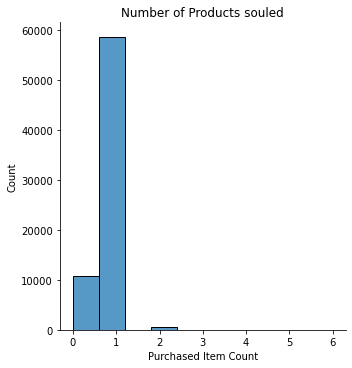

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['Purchased Item Count'],kde=False,bins=10)
plt.title("Number of Products souled")

plt.show()

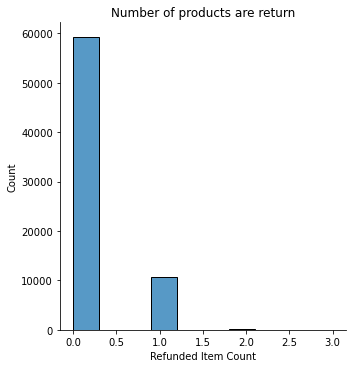

In [29]:

sns.displot(df['Refunded Item Count'],kde=False,bins=10)
plt.title("Number of products are return")

plt.show()

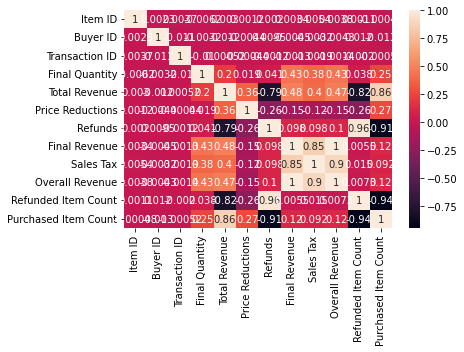

In [30]:
# Plot correlations between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Data Cleaning

Removing Irrelevant Label colunms

In [31]:
df.columns

Index(['Item Name', 'Category', 'Version', 'Item Code', 'Item ID', 'Buyer ID',
       'Transaction ID', 'Date', 'Final Quantity', 'Total Revenue',
       'Price Reductions', 'Refunds', 'Final Revenue', 'Sales Tax',
       'Overall Revenue', 'Refunded Item Count', 'Purchased Item Count'],
      dtype='object')

In [32]:
df.dtypes

Item Name                       object
Category                        object
Version                         object
Item Code                       object
Item ID                        float64
Buyer ID                       float64
Transaction ID                 float64
Date                    datetime64[ns]
Final Quantity                   int64
Total Revenue                  float64
Price Reductions               float64
Refunds                        float64
Final Revenue                  float64
Sales Tax                      float64
Overall Revenue                float64
Refunded Item Count              int64
Purchased Item Count             int64
dtype: object

In [33]:
# Creating new column based on condition prefeared for 'Refunded Item Count' column
df['Returned'] = df['Refunded Item Count'].apply(lambda x: 1 if x != 0 else 0)

In [34]:
df['Returned'].value_counts()

0    59269
1    10783
Name: Returned, dtype: int64

## Aggregating and Encoding Data

In [35]:
column_list = ["Buyer ID", "Category"]


aggregated_dataframe = df.groupby(column_list)['Purchased Item Count'].count().reset_index()

def encode_column(count):
    if count > 0:
        return 1
    else:
        return 0

aggregated_dataframe['products_ordered'] = aggregated_dataframe['Purchased Item Count'].apply(encode_column)

customers_orders = aggregated_dataframe.groupby("Buyer ID")['products_ordered'].sum().reset_index()
customers_orders.head()

,Buyer ID,products_ordered
0,1000661.0,1
1,1001914.0,1
2,1002167.0,3
3,1002387.0,1
4,1002419.0,2


In [36]:
customers_orders['products_ordered'].value_counts()

1     14228
2      6787
3      2732
4      1102
5       416
6       157
7        68
8        32
10        9
9         8
12        2
11        1
13        1
Name: products_ordered, dtype: int64

In [37]:
customers_orders.shape

(25543, 2)

## Calculating Average Return Rate by Customer Order

In [38]:
ordered_sum_by_customer_order = df.groupby(["Buyer ID", "Transaction ID"])['Purchased Item Count'].sum().reset_index()

returned_sum_by_customer_order = df.groupby(["Buyer ID", "Transaction ID"])['Refunded Item Count'].sum().reset_index()

ordered_returned_sums = pd.merge(ordered_sum_by_customer_order, returned_sum_by_customer_order,
                                  on=["Buyer ID", "Transaction ID"], how='left', suffixes=('_ordered', '_returned'))

ordered_returned_sums['average_return_rate'] = -ordered_returned_sums['Refunded Item Count'] / ordered_returned_sums['Purchased Item Count']

ordered_returned_sums

,Buyer ID,Transaction ID,Purchased Item Count,Refunded Item Count,average_return_rate
0,1.000661e+06,9.912000e+13,3,2,-0.666667
1,1.001914e+06,7.975860e+13,1,0,0.000000
2,1.002167e+06,2.310240e+13,0,1,-inf
3,1.002167e+06,3.815610e+13,1,0,0.000000
4,1.002167e+06,5.744010e+13,1,0,0.000000
...,...,...,...,...,...
43313,9.897420e+13,4.506680e+13,1,0,0.000000
43314,9.926270e+13,8.817390e+13,2,0,0.000000
43315,9.926270e+13,9.979860e+13,1,1,-1.000000
43316,9.954990e+13,5.524460e+13,1,0,0.000000


## Analyzing Customer Return Rates

In [39]:
customer_return_rate = ordered_returned_sums.groupby("Buyer ID")['average_return_rate'].mean().reset_index()

return_rates = customer_return_rate['average_return_rate'].value_counts().reset_index()
return_rates.columns = ["average return rate", "count of unit return rate"]

return_rates.columns = ["average return rate", "count of unit return rate"]

customers = pd.merge(customers_orders, customer_return_rate, on="Buyer ID", how='left')

customers

,Buyer ID,products_ordered,average_return_rate
0,1.000661e+06,1,-0.666667
1,1.001914e+06,1,0.000000
2,1.002167e+06,3,NaN
3,1.002387e+06,1,0.000000
4,1.002419e+06,2,-0.500000
...,...,...,...
25538,9.885470e+13,2,0.000000
25539,9.897420e+13,1,0.000000
25540,9.926270e+13,2,-0.500000
25541,9.954990e+13,1,0.000000


## Calculating Customer Total Spending

In [40]:
customer_total_spending = df.groupby("Buyer ID")['Overall Revenue'].sum().reset_index()

customer_total_spending = customer_total_spending.rename(columns={'Overall Revenue': 'total_spending'})

customer_total_spending

,Buyer ID,total_spending
0,1.000661e+06,433.33
1,1.001914e+06,79.20
2,1.002167e+06,300.95
3,1.002387e+06,89.00
4,1.002419e+06,152.90
...,...,...
25538,9.885470e+13,242.50
25539,9.897420e+13,89.00
25540,9.926270e+13,356.00
25541,9.954990e+13,64.00


## Merging and Cleaning Customer Data

In [41]:
customers = pd.merge(customers, customer_total_spending, on="Buyer ID", how='left')

customers = customers.drop("Buyer ID", axis=1)

customers

,products_ordered,average_return_rate,total_spending
0,1,-0.666667,433.33
1,1,0.000000,79.20
2,3,NaN,300.95
3,1,0.000000,89.00
4,2,-0.500000,152.90
...,...,...,...
25538,2,0.000000,242.50
25539,1,0.000000,89.00
25540,2,-0.500000,356.00
25541,1,0.000000,64.00


## Data Preprocessing and Encoding
### Performing Label Encoding

In [42]:
df['Category'] = df['Category'].replace(('Product P','Product H','Product D',
                                             'Product B','Product N',
                                             'Product W','Product A','Product C','Product R',
                                             'Product J','Product O',
                                             'Product F','Product Q',
                                             'Product G','Product I',
                                             'Product M','Product U','DPR',
                                             'Product T','Product E','Product L',
                                             'Product K','Product S'), 
                                            
                                            ('Drinkware','Perfume and cologne','Art and crafting materials','Skin care and Makeup beauty','Coffee products','Books',
                                             'Toys','Cleaning products','Blankets','Electronics','Posters and artwork design',
                                             'Candles','Furnishings','Socks and shoes','Laptops','Motor vehicle parts',
                                             'Paper','Pens','Phones','Stones',
                                             'Coats and jackets','Nail care','Bedsheets'))

df['Category'].value_counts()

Drinkware                      23352
Perfume and cologne            15963
Art and crafting materials      7079
Skin care and Makeup beauty     3510
Coffee products                 3348
Books                           2677
Toys                            2461
Cleaning products               2456
Blankets                        2106
Electronics                     1549
Posters and artwork design      1158
Candles                         1055
Furnishings                      638
Socks and shoes                  548
Laptops                          499
Motor vehicle parts              449
Paper                            383
Pens                             266
Phones                           228
Stones                           201
Coats and jackets                115
Nail care                         10
Bedsheets                          1
Name: Category, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['Category']:
  df[col] = le.fit_transform(df[col])
df.head()

,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count,Returned
66018,QID,22,35 / A / FtO,30-C60-455-D74-A-363ECC7,24064862.0,6659760.0,2.012430e+13,2018-11-01,1,107.50,0.00,0.0,107.50,21.50,129.00,0,1,0
795,RJF,8,31 / C / FtO,E5-0D6-8F7-54E-E-B39435C,28266788.0,1124349.0,7.477980e+13,2018-11-01,1,74.17,20.84,0.0,53.33,10.67,64.00,0,1,0
67314,WHX,8,34 / B / FtO,4A-30E-267-CB3-1-506E7F7,35638092.0,1014195.0,4.676050e+13,2018-11-01,1,74.17,20.84,0.0,53.33,10.67,64.00,0,1,0
31438,WHX,0,33 / B / FtO,1E-6CF-5AF-AA7-E-0D1A481,31220529.0,4714957.0,8.089180e+13,2018-11-01,1,74.17,0.00,0.0,74.17,14.83,89.00,0,1,0
31476,NSP,8,32 / A / FtO,1D-053-5C5-9F2-6-70A5E10,22559066.0,6251344.0,3.825290e+13,2018-11-01,1,74.17,9.87,0.0,64.30,12.86,77.16,0,1,0


In [44]:
df['Category'].value_counts()

8     23352
16    15963
0      7079
19     3510
7      3348
3      2677
22     2461
5      2456
2      2106
9      1549
18     1158
4      1055
10      638
20      548
11      499
12      449
14      383
15      266
17      228
21      201
6       115
13       10
1         1
Name: Category, dtype: int64


# Model Building

### Prepare Train and Test Data

In [45]:

features= df[['Category','Final Quantity', 'Total Revenue', 'Price Reductions', 'Final Revenue', 'Sales Tax',
              'Overall Revenue', 'Purchased Item Count']]

labels = df['Returned'] 

In [46]:

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (56041, 8)
Testing Set : (14011, 8)


# ML Algorithms

In [47]:
models = dict()

####  Decision Tree Classifier

In [48]:
from sklearn.metrics import accuracy_score, classification_report

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeClassifier()

In [50]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 100.0%
Test Score : 100.0%


In [51]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("********** Decision Tree Regressor - Model Evaluation **********")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

********** Decision Tree Regressor - Model Evaluation **********
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0


#### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [53]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 96.27%
Test Score : 95.85%


In [54]:
print("************** Linear Regression - Model Evaluation ************")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

************** Linear Regression - Model Evaluation ************
Mean Absolute Error (MAE): 0.017888292468375963
Mean Squared Error (MSE): 0.005502996545502228
Root Mean Squared Error (RMSE): 0.07418218482561853


#### Support Vector Machine

In [55]:
from sklearn.svm import SVC
svm = SVC()
# Train Model
svm.fit(train_features, train_labels)

SVC()

In [56]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 



Train Score : 99.99%
Test Score : 99.97%


In [57]:
print("*****************Support Vector Regression - Model Evaluation**************")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

*****************Support Vector Regression - Model Evaluation**************
Mean Absolute Error (MAE): 0.0002141174791235458
Mean Squared Error (MSE): 0.0002141174791235458
Root Mean Squared Error (RMSE): 0.014632753641182708


### Random forestclassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
forestc = RandomForestClassifier()
# Train Model
forestc.fit(train_features, train_labels)

RandomForestClassifier()

In [59]:
# Evaluate Model
train_score_forest = str(forestc.score(train_features, train_labels)*100)
test_score_forest = str(forestc.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forestc"] = test_score_forest

Train Score : 100.0%
Test Score : 100.0%


In [60]:
print("************** Random Forest Regression - Model Evaluation ****************")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forestc.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forestc.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forestc.predict(test_features)))))

************** Random Forest Regression - Model Evaluation ****************
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0


## Best Model 

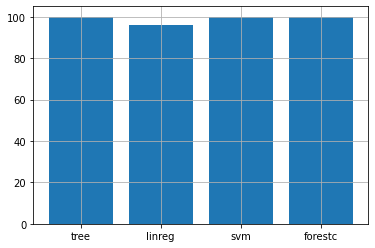

In [61]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)
plt.grid()
plt.show()

# Predictions

In [62]:
labels_pred=forestc.predict(test_features)

In [63]:
labels_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

# check Accuracy

In [64]:
#pip install scikit-learn

In [65]:
from sklearn.metrics import accuracy_score
score=accuracy_score(test_labels,labels_pred)

In [66]:
print(score)

1.0


In [67]:
### create a pickle file using serialization
import pickle
pickle_out = open("1forestc.pkl","wb")
pickle.dump(forestc,pickle_out)
pickle_out.close()

In [68]:
model = pickle.load(open('1forestc.pkl','rb'))

In [69]:
import numpy as np

In [70]:
 '''['Category','Final Quantity', 'Total Revenue', 'Price Reductions',
 'Refunds', 'Final Revenue', 'Sales Tax',
 'Overall Revenue', 'Refunded Item Count', 'Purchased Item Count']'''
# input_data = [[2, 2, 3, value1, value2, value3, value4, value5, value6]]
#input_data = [[1,74.17,0,74.17,14.83,89.0,2]]

"['Category','Final Quantity', 'Total Revenue', 'Price Reductions',\n'Refunds', 'Final Revenue', 'Sales Tax',\n'Overall Revenue', 'Refunded Item Count', 'Purchased Item Count']"

In [71]:
Category = int(input('Enter the product number upto 0 to 22 :  '))
Final_Quantity  = int(input('Enter the number of products ordered:  '))
Total_Revenue   = float(input('Enter the Droduct cost of tax not included:  '))
Price_Reductions= float(input('Enter the Discount price:  '))
Final_Revenue   = Total_Revenue 
Sales_Tax       = float(input('Enter the cost of Sales Tax:  '))
Overall_Revenue = Final_Revenue + Sales_Tax
Purchased_Item_Count = Final_Quantity

input_data=[[Category,Final_Quantity, Total_Revenue, Price_Reductions,
             Final_Revenue, Sales_Tax,
             Overall_Revenue, Purchased_Item_Count]]

Enter the product number upto 0 to 22 :  3
Enter the number of products ordered:  6
Enter the Droduct cost of tax not included:  6482
Enter the Discount price:  324
Enter the cost of Sales Tax:  21


In [72]:
#input_data = [[8,1,0,0,79.1,15.8,94.9,0]]

In [73]:
predictions = model.predict(input_data)
print("Predictions:", predictions)

Predictions: [0]


In [74]:
if predictions != 0:
    print('Product will predicted to be return')
else:
    print('Product will predicted not to be return')


Product will predicted not to be return
